In [1]:
import cv2
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

### Load an Image

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

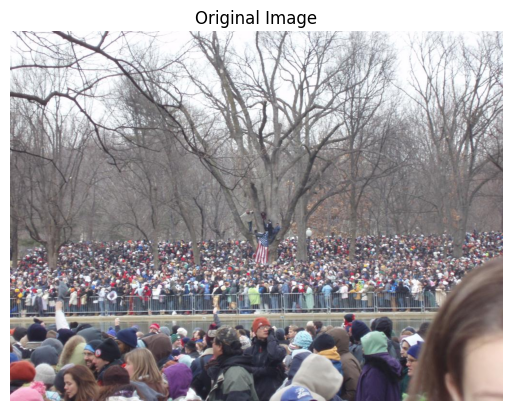

In [2]:
image_path = "data/ShanghaiTech/part_A/train_data/images/IMG_1.jpg"

# Read & convert to RGB
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

### Load Ground truth Points

In [3]:
mat_path = "data/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_1.mat"

mat = sio.loadmat(mat_path)
points = mat["image_info"][0][0][0][0][0] 

print("Total points:", len(points))
points[:10]  

Total points: 1546


array([[ 29.6225116 , 472.92022152],
       [ 54.35533603, 454.96602305],
       [ 51.79045053, 460.46220626],
       [ 51.79045053, 465.77518336],
       [ 50.87442   , 473.65304595],
       [ 27.24083221, 478.41640473],
       [ 22.84388565, 479.69884748],
       [ 19.17976351, 487.75991618],
       [ 30.53854213, 481.53090855],
       [ 34.38587038, 482.9965574 ]])

### visualize head points on image

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

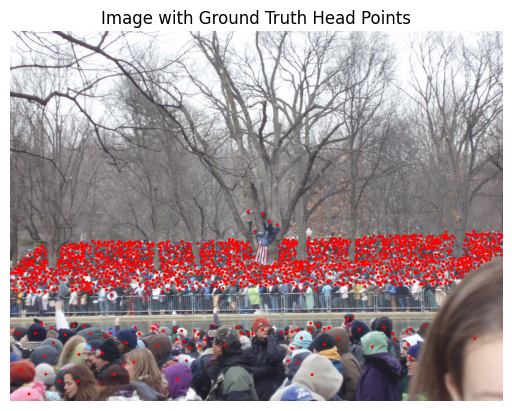

In [4]:
img_with_points = img_rgb.copy()
for x, y in points:
    cv2.circle(img_with_points, (int(x), int(y)), 3, (255, 0, 0), -1)

plt.imshow(img_with_points)
plt.title("Image with Ground Truth Head Points")
plt.axis("off")

### create impulse map

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

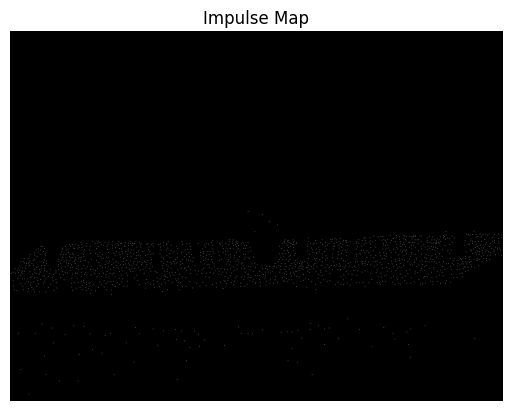

In [5]:
h, w = img_with_points.shape[:2]
impulse_map = np.zeros((h, w), dtype=np.float32)

for x, y in points:
    if 0 <= int(x) < w and 0 <= int(y) < h:
        impulse_map[int(y), int(x)] = 1

plt.imshow(impulse_map, cmap="gray")
plt.title("Impulse Map")
plt.axis("off")

### apply gaussian filter

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

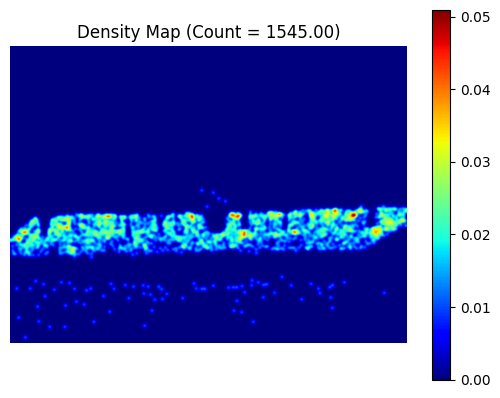

In [6]:
density_map = gaussian_filter(impulse_map, sigma=4)

plt.imshow(density_map, cmap="jet")
plt.title(f"Density Map (Count = {density_map.sum():.2f})")
plt.colorbar()
plt.axis("off")

### overlay heatmap

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

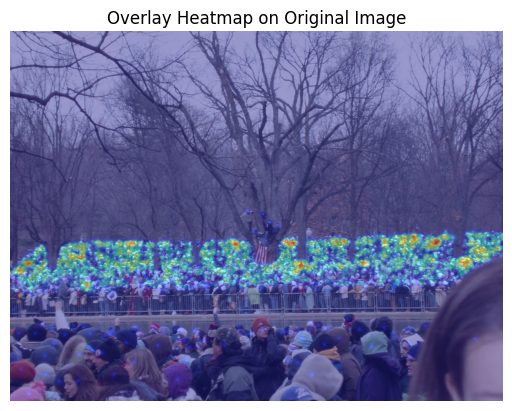

In [7]:
heatmap = cv2.applyColorMap((density_map/density_map.max()*255).astype(np.uint8),
                            cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

overlay = cv2.addWeighted(img_rgb, 0.6, heatmap, 0.4, 0)

plt.imshow(overlay)
plt.title("Overlay Heatmap on Original Image")
plt.axis("off")